## Logistic Regression

In [8]:
# Author: Tree
# If you want to refer this example, please note the Author

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook


In [9]:

# Controlled dataset
X, y = datasets.make_blobs(n_samples=100,\
                           n_features=2,\
                           centers=2,\
                           cluster_std=2,\
                           center_box=(-18, 18),\
                           random_state=1234)



def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 10, x.max() + 10
    y_min, y_max = y.min() - 10, y.max() + 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy




def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



<IPython.core.display.Javascript object>


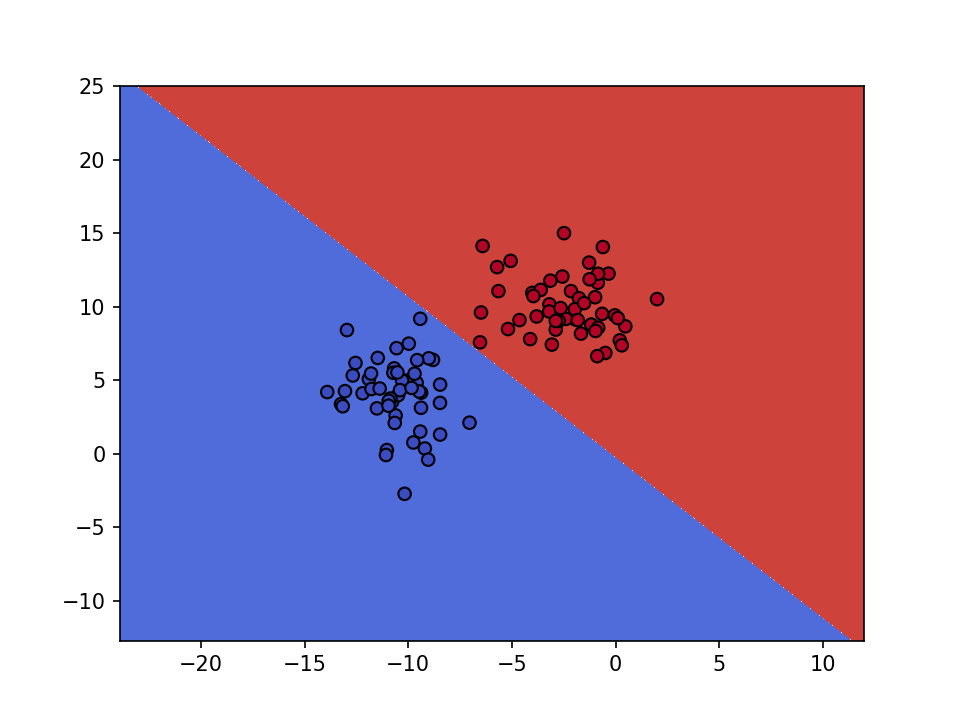

interactive(children=(Dropdown(description='centers', index=1, options=(1, 2, 3, 4, 5, 6), value=2), Dropdown(…

<function __main__.update(centers=2, cluster_std=2, C=1)>

In [13]:
# Model
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Meshgrid
Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Figure
fig, ax = plt.subplots(1, 1)
contours = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
points = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_xlim(xx.min(), xx.max())
# ax.set_ylim(yy.min(), yy.max())


def update(centers=2, cluster_std=2, C=1):
    
    
    # Controlled dataset
    X, y = datasets.make_blobs(n_samples=100,\
                               n_features=2,\
                               centers=centers,\
                               cluster_std=cluster_std,\
                               center_box=(-18, 18),\
                               random_state=1234)
    # Meshgrid
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    

    logistic_regression = LogisticRegression(C=C)
    logistic_regression.fit(X, y)
    
    
    # Predict
    Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contours.ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    points.axes.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    print('Finished training and predicting')
    print(f'{logistic_regression.decision_function(X)}')
    
    
    

interact(update,\
         centers=[1,2,3,4,5,6],\
         cluster_std=[1,2,3,4,5,6,7,8,9,10],\
         C=widgets.FloatSlider(min=1, max=10, step=1, value=3)
        )